**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KDTree
from sklearn.feature_extraction.text import CountVectorizer
import sklearn
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metr='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metr = metr
    
    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.X_train = X
            self.y_train = y
        elif self.algorithm == 'kd_tree':
            self.tree = sklearn.neighbors.KDTree(X, leaf_size=2)
            self.y_train = y
    
    def predict(self, X):
        if self.algorithm == 'brute':
            index_of_nearest = np.argpartition(scipy.spatial.distance.cdist(X, self.X_train, metric=self.metr), self.n_neighbors, axis=1)[:, :self.n_neighbors]
            b = np.array([])
            for i in self.y_train[index_of_nearest]:
                b = np.append(b, np.argmax(np.bincount(i)))
            return b.astype(dtype='int')
        elif self.algorithm == 'kd_tree':
            index_of_nearest = self.tree.query(X, k=self.n_neighbors, return_distance = False)
            b = np.array([])
            for i in self.y_train[index_of_nearest]:
                b = np.append(b, np.argmax(np.bincount(i)))
            return b.astype(dtype='int')
            

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [54]:
iris = datasets.load_iris()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [56]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [57]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [58]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [59]:
%time clf.fit(X_train, y_train)

CPU times: user 851 µs, sys: 3 µs, total: 854 µs
Wall time: 672 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [60]:
%time my_clf.fit(X_train, y_train)

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 23.1 µs


In [61]:
%time clf.predict(X_test)

CPU times: user 5.07 ms, sys: 0 ns, total: 5.07 ms
Wall time: 5.39 ms


array([2, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 1])

In [62]:
%time my_clf.predict(X_test)

CPU times: user 1.65 ms, sys: 4 µs, total: 1.65 ms
Wall time: 1.44 ms


array([2, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [76]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [77]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [78]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 2.94 ms, total: 2.94 ms
Wall time: 5.92 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [79]:
%time my_clf.fit(X_train, y_train)

CPU times: user 879 µs, sys: 2 µs, total: 881 µs
Wall time: 781 µs


In [80]:
%time clf.predict(X_test)

CPU times: user 6.74 ms, sys: 0 ns, total: 6.74 ms
Wall time: 7.18 ms


array([1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1])

In [81]:
%time my_clf.predict(X_test)

CPU times: user 3.27 ms, sys: 9 µs, total: 3.28 ms
Wall time: 3.87 ms


array([1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1])

In [82]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [3]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [4]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [5]:
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [10]:
from sklearn.model_selection import KFold

In [11]:
#Аналог sklearn.cross_validation.KFold - sklearn.model_selection.KFold
kf = sklearn.model_selection.KFold(n_splits=3)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [52]:
accur_choose1 = []
my_clf = []
for i in range(1, 11):
    accuracy = 0
    total = 0
    my_clf.append(MyKNeighborsClassifier(n_neighbors=i, algorithm='brute'))
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target[train_index], target[test_index]
        my_clf[i - 1].fit(X_train.toarray(), y_train)
        y_pred = my_clf[i - 1].predict(X_test.toarray())
        accuracy += (y_pred == y_test).sum() / y_test.shape[0]
        total += 1
    print("total: ", accuracy / total)
    accur_choose1.append(accuracy / total)


total:  0.18260631942212335
total:  0.169790026564096
total:  0.17288303914480463
total:  0.17403213619144597
total:  0.17350224157701435
total:  0.17456301504317662
total:  0.1776566603478632
total:  0.1819874685032347
total:  0.18410885139600938
total:  0.18419703437116


In [54]:
np.max(accur_choose1)

0.18419703437116

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(data)

In [111]:
accur_choose2 = [] #Vectrrizer+cosine
my_clf = []
for i in range(1, 11):
    accuracy = 0
    total = 0
    my_clf.append(MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metr='cosine'))
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target[train_index], target[test_index]
        my_clf[i - 1].fit(X_train.toarray(), y_train)
        y_pred = my_clf[i - 1].predict(X_test.toarray())
        accuracy += (y_pred == y_test).sum() / y_test.shape[0]
        total += 1
    print("total: ", accuracy / total)
    accur_choose2.append(accuracy / total)

total:  0.24783395148122558
total:  0.24040968549493877
total:  0.2399674583027868
total:  0.23837641527465048
total:  0.2413816666961938
total:  0.24288438614385108
total:  0.24465226380671679
total:  0.24562452621862874
total:  0.24509458473575432
total:  0.24208956765642506


In [112]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data)

In [113]:
accur_choose3 = [] #Tfldf + euclidian
my_clf = []
for i in range(1, 11):
    accuracy = 0
    total = 0
    my_clf.append(MyKNeighborsClassifier(n_neighbors=i, algorithm='brute'))
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target[train_index], target[test_index]
        my_clf[i - 1].fit(X_train.toarray(), y_train)
        y_pred = my_clf[i - 1].predict(X_test.toarray())
        accuracy += (y_pred == y_test).sum() / y_test.shape[0]
        total += 1
    print("total: ", accuracy / total)
    accur_choose3.append(accuracy / total)

total:  0.27169809711310083
total:  0.21124260990110852
total:  0.2198159026313725
total:  0.21522002999767811
total:  0.21309848306535362
total:  0.20982800312593766
total:  0.2084138650351949
total:  0.20576249379110303
total:  0.20364118120099262
total:  0.2008128347168429


In [76]:
accur_choose4 = [] #Tf + cosine
my_clf = []
for i in range(1, 11):
    accuracy = 0
    total = 0
    my_clf.append(MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metr='cosine'))
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = target[train_index], target[test_index]
        my_clf[i - 1].fit(X_train.toarray(), y_train)
        y_pred = my_clf[i - 1].predict(X_test.toarray())
        accuracy += (y_pred == y_test).sum() / y_test.shape[0]
        total += 1
    print("total: ", accuracy / total)
    accur_choose4.append(accuracy / total)

total:  0.4038358445913677
total:  0.38774949360990957
total:  0.3962342752859233
total:  0.40233338292014587
total:  0.4110837211931318
total:  0.41400015691554654
total:  0.4179774364067878
total:  0.42301525502197707
total:  0.4251367785200802
total:  0.42443009613936206


In [88]:
np.max(accur_choose4)

0.4251367785200802

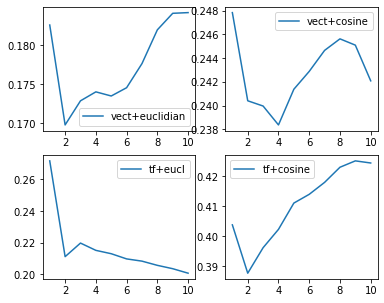

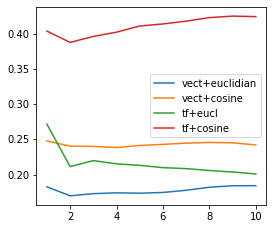

In [126]:
fig = plt.figure(figsize= (6,5))
ax = plt.subplot(221)
ax.plot(np.arange(1,11), accur_choose1, label='vect+euclidian')
plt.legend(loc='best')
ax = plt.subplot(222)
ax.plot(np.arange(1,11), accur_choose2, label='vect+cosine')
plt.legend(loc='best')
ax = plt.subplot(223)
ax.plot(np.arange(1,11), accur_choose3, label='tf+eucl')
plt.legend(loc='best')
ax = plt.subplot(224)
ax.plot(np.arange(1,11), accur_choose4, label='tf+cosine')
plt.legend(loc='best')
fig = plt.figure(figsize= (14,8))
ax = plt.subplot(233)
ax.plot(np.arange(1,11), accur_choose1, label='vect+euclidian')
ax.plot(np.arange(1,11), accur_choose2, label='vect+cosine')
ax.plot(np.arange(1,11), accur_choose3, label='tf+eucl')
ax.plot(np.arange(1,11), accur_choose4, label='tf+cosine')
plt.legend(loc='best')

In [235]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data)
opt_clf = MyKNeighborsClassifier(n_neighbors=9, algorithm='brute', metr='cosine')
opt_clf.fit(X.toarray(), target)

In [236]:
X.shape

(11314, 1000)

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [237]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','fohttps://vk.com/dastanzionno?z=video-175559488_456239024%2F6bafd28d357901cc0b%2Fpl_post_-175559488_931oters', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [238]:
data1 = newsgroups['data']
target1 = newsgroups['target']

In [239]:
vectorizer1 = TfidfVectorizer(vocabulary=vectorizer.get_feature_names())
X1 = vectorizer1.fit_transform(data1)

In [240]:
X1.shape

(7532, 1000)

In [241]:
target1.shape


(7532,)

In [242]:
((opt_clf.predict(X1.toarray()) == target1).sum()) / target1.shape[0]

0.38183749336165695

 Отличается не сильно. Качество отличается из-за того, что разные тесты). Модель больше подстроилась под тесты из валидации, чем под тесты тесты.

Попробуем добавить больше фичей и соседей

In [12]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data)

In [14]:
i = 40
my_clf = []
accuracy = 0
total = 0
my_clf.append(MyKNeighborsClassifier(n_neighbors=i, algorithm='brute', metr='cosine'))
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target[train_index], target[test_index]
    my_clf[0].fit(X_train.toarray(), y_train)
    y_pred = my_clf[0].predict(X_test.toarray())
    accuracy += (y_pred == y_test).sum() / y_test.shape[0]
    total += 1
print("total: ", accuracy / total)

total:  0.5265156340470741


In [17]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data)
opt_clf = MyKNeighborsClassifier(n_neighbors=40, algorithm='brute', metr='cosine')
opt_clf.fit(X.toarray(), target)

In [20]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','fohttps://vk.com/dastanzionno?z=video-175559488_456239024%2F6bafd28d357901cc0b%2Fpl_post_-175559488_931oters', 'quotes'])

In [21]:
data1 = newsgroups['data']
target1 = newsgroups['target']

In [22]:
vectorizer1 = TfidfVectorizer(vocabulary=vectorizer.get_feature_names())
X1 = vectorizer1.fit_transform(data1)

In [23]:
((opt_clf.predict(X1.toarray()) == target1).sum()) / target1.shape[0]

0.5069038767923526

Отличие не сильное